In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,f1_score,precision_score
from sklearn.preprocessing import LabelEncoder

In [2]:
csvPath = r"C:\Users\YSK\Desktop\1030520813_patternrecognition_final_project\breast-cancer.csv"
dataset = pd.read_csv(csvPath)
dataset = dataset.drop(['id'],axis=1)
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


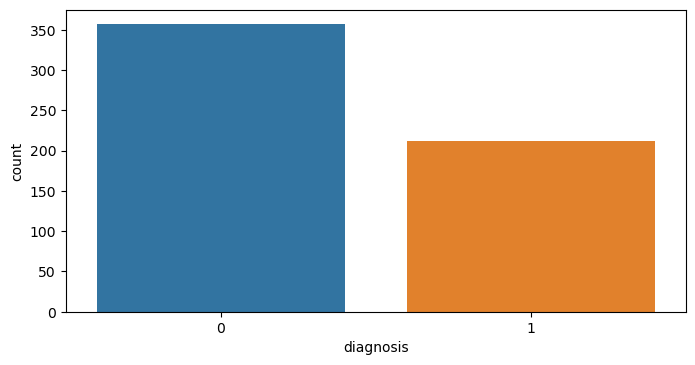

In [3]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = dataset, x = 'diagnosis')
plt.show()

<AxesSubplot:>

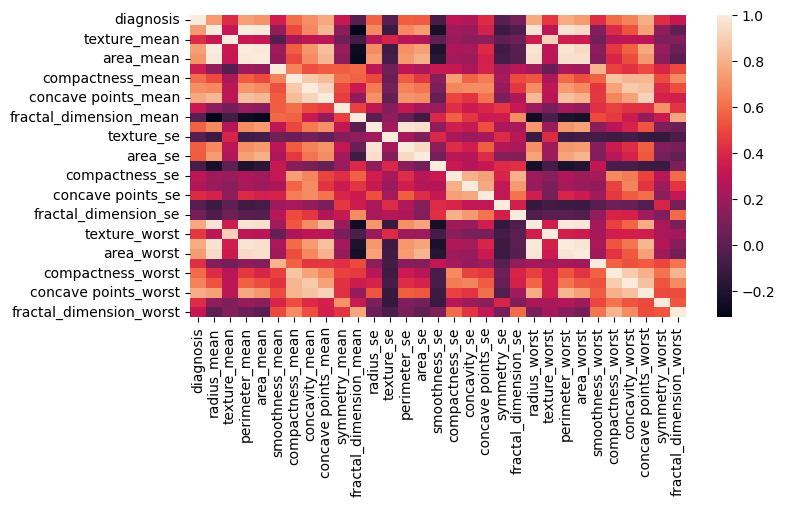

In [4]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(dataset.corr())

In [5]:
X= dataset.iloc[:, 1 :].astype("float64").to_numpy()
sc = StandardScaler() 
le=LabelEncoder()
y = le.fit_transform(dataset.iloc[:, 0])

In [6]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy'); # compile

In [7]:
kfold=KFold(n_splits=5)
for f_index,(train_idx,test_idx) in enumerate(kfold.split(X,y)):
    print("Fold ",f_index+1)
    X_train,X_test = X[train_idx],X[test_idx]
    y_train,y_test = y[train_idx],y[test_idx]
    print(f"Fold {f_index+1} training")
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
    model.fit(x=X_train,y=y_train,  
          validation_data=(X_test,y_test),epochs=600, callbacks = [early_stop])

Fold  1
Fold 1 training
Epoch 1/600
15/15 [==============================] - 1s 14ms/step - loss: 113.1959 - val_loss: 20.6718
Epoch 2/600
15/15 [==============================] - 0s 3ms/step - loss: 92.1414 - val_loss: 2.7023
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 84.9696 - val_loss: 2.8514
Epoch 4/600
15/15 [==============================] - 0s 3ms/step - loss: 64.4113 - val_loss: 0.9180
Epoch 5/600
15/15 [==============================] - 0s 3ms/step - loss: 54.3226 - val_loss: 1.0661
Epoch 6/600
15/15 [==============================] - 0s 3ms/step - loss: 56.4835 - val_loss: 0.8369
Epoch 7/600
15/15 [==============================] - 0s 3ms/step - loss: 35.0705 - val_loss: 2.2196
Epoch 8/600
15/15 [==============================] - 0s 3ms/step - loss: 38.0456 - val_loss: 1.8538
Epoch 9/600
15/15 [==============================] - 0s 3ms/step - loss: 30.0431 - val_loss: 0.4610
Epoch 10/600
15/15 [==============================] - 0s 3ms/step - loss:

In [8]:
y_pred = model.predict(X_test) 
predictions = np.round(y_pred).astype(int)   
print(classification_report(y_test,predictions))   
cMatrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cMatrix)
print("Accuracy:", accuracy_score(y_test, predictions))
print('Sensitivity : ', cMatrix[0, 0]/(cMatrix[0, 0]+cMatrix[0, 1]))
print('Specificity : ', cMatrix[1, 1]/(cMatrix[1, 0]+cMatrix[1, 1]))
print('AUC :', roc_auc_score(y_test, predictions))
print('f1-score:', f1_score(y_test, predictions))
print('Precision:', precision_score(y_test, predictions))

4/4 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        87
           1       0.88      0.81      0.84        26

    accuracy                           0.93       113
   macro avg       0.91      0.89      0.90       113
weighted avg       0.93      0.93      0.93       113

Confusion Matrix:
 [[84  3]
 [ 5 21]]
Accuracy: 0.9292035398230089
Sensitivity :  0.9655172413793104
Specificity :  0.8076923076923077
AUC : 0.886604774535809
f1-score: 0.8400000000000001
Precision: 0.875
